# Gráficos interactivos <a class="tocSkip">

# Trabajo simple con imágenes

Vamos a empezar leyendo y mostrando algunas imágenes, para entender cómo es su representación.
Para leer y escribir imágenes vamos a usar el paquete adicional `imageio`. **Scipy** tiene funciones (con el mismo nombre) para realizar este trabajo en el submódulo `misc` pero está planeado que desaparezcan en un futuro no muy lejano.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#from scipy import misc

In [2]:
# El paquete imageio debe ser instalado separadamente
try:
  from imageio import imread
except:
# scipy.misc dejara pronto de proveer imread
  from scipy.misc import imread

El siguiente ejemplo es de algunas pruebas que hicimos en el laboratorio hace unos años, de medición de flujo en toberas

La imagen "imag1" es del tipo: <class 'imageio.core.util.Array'> con "shape" (272, 652, 3)


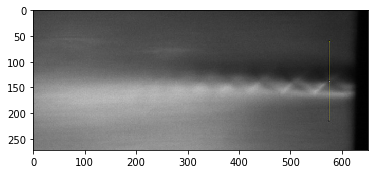

In [3]:
imag1= imread('figuras/imagen_flujo.jpg')
print('La imagen "imag1" es del tipo:', type(imag1), 'con "shape"', imag1.shape)
plt.imshow(imag1);

La representación de la imagen es una matriz, donde cada elemento corresponde a un pixel, y cada pixel tiene tres valores

In [4]:
print(imag1.ndim, imag1.shape)

3 (272, 652, 3)


In [5]:
print(imag1[0,0:2])             # Veamos los primeros dos elementos
print(imag1.min(),imag1.max())  # y sus valores mínimo y máximo

[[65 65 65]
 [66 66 66]]
0 255


Como tenemos una figura en escala de grises vamos a convertir los tres colores a una simple escala, por ejemplo promediando

In [8]:
imag2= imread('figuras/imagen_flujo.jpg', as_gray=True)
#imag2 = np.sum(imag1, axis=-1)//3
print(imag2.shape)

(272, 652)


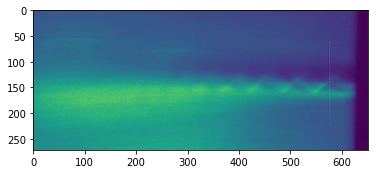

In [9]:
plt.imshow(imag2)

¿Qué pasó acá?

La función `imshow()` está interpretando el valor de cada pixel como una posición en una cierta escala de colores (**colormap**). Como no especificamos cuál queremos utilizar, se usó el cmap *default*. Especifiquemos otros:

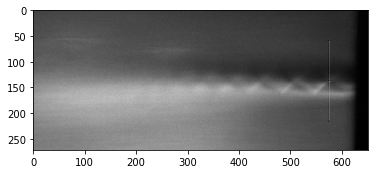

In [10]:
plt.imshow(imag2, cmap='gray')

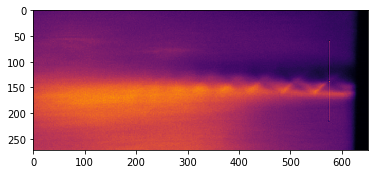

In [11]:
plt.imshow(imag2, cmap='inferno')

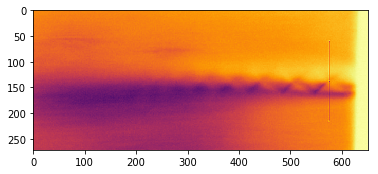

In [12]:
plt.imshow(imag2, cmap='inferno_r')

La referencia de ubicación de los `cmap` existentes está en:
http://matplotlib.org/examples/color/colormaps_reference.html

## Análisis de la imagen

Trabajemos un poco sobre la imagen.

Por ejemplo podemos calcular un histograma de intensidades, analizando toda la imagen.

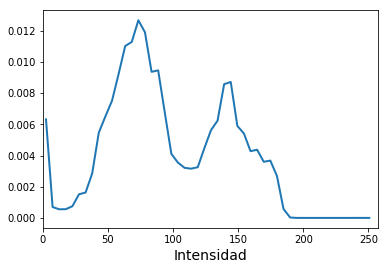

In [16]:
hist, bin_edges = np.histogram(imag2, bins=50, density=True)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])
plt.plot(bin_centers, hist)
plt.xlabel('Intensidad')
plt.xlim((0,257));

In [ ]:
limit= 105
binary_img= imag2 > limit

In [ ]:
# Creamos una figura con tres gráficos
fig, ax= plt.subplots(figsize=(12,2), ncols=2)
ax[0].imshow(imag2, cmap=plt.cm.gray, interpolation='nearest')
ax[0].axis('off')
ax[1].plot(bin_centers, hist, lw=2)
ax[1].text(270, .9*hist.max(), 'histograma', fontsize=20)
ax[1].set_yticks([])
plt.subplots_adjust(wspace=-0.10, hspace=0.0, top=1, bottom=0.1, left=-0.2, right=1)

Estos histogramas, son útiles pero no dan información sobre las variaciones de intensidad con la posición. De alguna manera estamos integrando demasiado. Cuando vemos la imagen, vemos un mapa de intensidad en dos dimensiones. Al hacer el histograma perdemos toda la información sobre la posición. 

Un análisis intermedio podemos hacerlo haciendo cortes a lo largo de alguna línea y analizando la intensidad. Por ejemplo, podemos elegir una línea vertical en un punto $x_0$, y analizar como varía la intensidad a lo largo de esa línea:

posición en eje x= 507


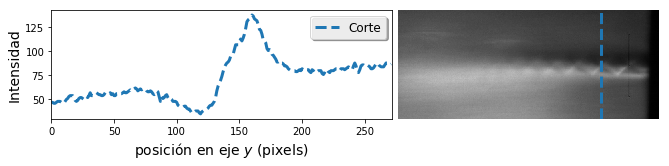

In [17]:
x0 = int(imag2.shape[1]*7/9)      # Elegimos un punto en el eje x
print('posición en eje x=',x0)
fig, (ax2, ax1) = plt.subplots(ncols=2, figsize=(10,2))
ax1.imshow(imag2, cmap=plt.cm.gray, interpolation='nearest')
ax1.axvline(x0, ls='--', lw=3)
ax1.axis('off')
line = imag2[:,x0]
ax2.plot(line,'--', lw=3, label='Corte')
ax2.set_xlabel(u'posición en eje $y$ (pixels)')
ax2.set_ylabel('Intensidad')
ax2.legend(loc='best')
ax2.set_xlim((0,len(line)))
#plt.imshow(binaria_img, cmap=plt.cm.gray, interpolation='nearest')
plt.subplots_adjust(wspace=-0.1, left=0)
ax2.axvline(x0, color='b', ls='--', lw=3);


# Gráficos interactivos ("widgets")

Veamos cómo se puede hacer este tipo de trabajo en forma interactiva. Para ello **Matplotlib** tiene un submódulo `widgets` que están diseñados para funcionar con cualquier *backend* interactivo. (más información en: http://matplotlib.org/api/widgets_api.html)

Empecemos estudiando como agregar un marcador de cursor

## Cursor

```python
# Archivo cursor.py

from matplotlib.widgets import Cursor
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))

x, y = 4 * (np.random.rand(2, 100) - .5)
ax.plot(x, y, 'o')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# set useblit = True on gtkagg for enhanced performance
cursor = Cursor(ax, useblit=True, color='red', linewidth=2)

plt.show()
```

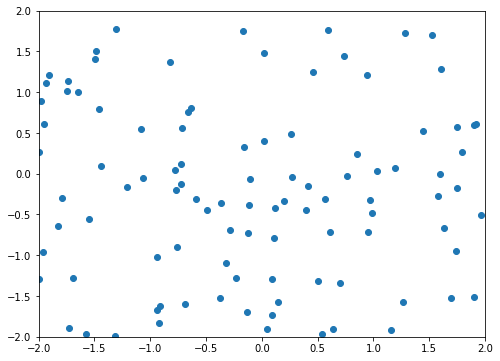

In [18]:
%matplotlib tk
import matplotlib.pyplot as plt
%run scripts/ejemplo_cursor.py

En este ejemplo simple conocemos casi todas las líneas (creamos la figura y graficamos). Las líneas novedosas y relevantes son

1. La primera línea importando la función `Cursor()` para describir el *cursor* o *mouse*:
```python
from matplotlib.widgets import Cursor
```
2. La línea en que usamos la función
```python
cursor = Cursor(ax, useblit=True, color='red', linewidth=2)
```
que crea el objeto `Cursor`:
```python
Cursor(ax, horizOn=True, vertOn=True, useblit=False, **lineprops)
```
Toma como argumento el eje en el cuál agregamos el cursor, y tiene opciones para controlar la visibilidad de la línea horizontal (`horizOn`) y vertical (`vertOn`). Además tiene argumentos *keyword* para controlar la apariencia de las líneas. En este ejemplo pusimos explícitamente que queremos una línea roja, de un grosor de 2.

## Manejo de eventos

Es importante obtener datos de la interacción con el gráfico. Se encuentra información buscando "Event handling".

Para recibir *events* necesitamos **escribir y conectar** una función que se activa cuando ocurre el evento (*callback*). Veamos un ejemplo simple pero importante, donde imprimimos las coordenadas donde se presiona el *mouse*.

In [19]:
%matplotlib tk
%run scripts/ejemplo_callback.py

```python
# Archivo: ejemplo_callback.py
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(np.random.rand(10), 'o-', lw=3)

def onclick(event):
  print('button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
        (event.button, event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()
```

En este ejemplo utilizamos el método `mpl_connect` del objeto `canvas`.

- El objeto `canvas` es el área donde se dibuja la figura. 
- La función `mpl_connect` realiza la conección de la función (que aquí llamamos `onclick`) con la figura.
  Esta función toma como argumento el *event* (que, para nosotros, es interpretado automaticamente por Matplotlib)

- El objeto `event` es de tipo `button_press_event`. Se dispara cuando apretamos un botón del *mouse* y contiene información que estamos imprimiendo por pantalla:
  - `event.button`: indica que botón se presionó
  - `event.x`, `event.y`: dan la información sobre el índice en los ejes horizontal y vertical
  - `event.xdata, event.ydata`: dan los valores de los datos en los ejes.


Más información en http://matplotlib.org/users/event_handling.html.

## Ejemplos integrados

Continuando con esta idea vamos a usar la capacidad de poder elegir una zona del gráfico para obtener información sobre los datos.

In [20]:
%run scripts/analizar_figura_1.py


```python
# Archivo: scripts/analizar_figura_1.py
import matplotlib.pyplot as plt
import imageio
from matplotlib.widgets import Cursor

img = imageio.imread('../figuras/imagen_flujo.png', as_gray=True)
ymax = img.max()


def seleccionar(event):
  """Secuencia:
  1. Encuentro el punto donde el mouse hizo 'click'
  2. Le doy valores a la línea vertical
  3. Le doy valores a la curva en el grafico de la derecha
  4. y 5. Grafico los nuevos valores
  """
  x0 = event.xdata
  n0 = int(x0)
  l1.set_data([[n0, n0], [0., 1.]])
  l2.set_data(range(img.shape[0]), img[:, n0])
  l1.figure.canvas.draw()
  l2.figure.canvas.draw()


# Defino la figura
fig, (ax1, ax2) = plt.subplots(figsize=(12, 4), ncols=2)

# Mostramos la imagen como un mapa de grises
ax1.imshow(img, cmap='gray', interpolation='nearest')
ax1.axis('off')

# Agrego la línea inicial en un valor inicial
x0 = 100
l1 = ax1.axvline(x0, color='r', ls='--', lw=3)

# Grafico de la derecha
l2, = ax2.plot(img[:, x0], 'r-', lw=2, label='corte')
ax2.set_ylim((0, ymax))
ax2.set_xlabel(u'posición en eje $y$ (pixels)')
ax2.set_ylabel('Intensidad')
ax2.legend(loc='best')

fig.tight_layout()

# Agrego el cursor y conecto la accion de presionar a la funcion click
cursor = Cursor(ax1, horizOn=False, vertOn=True, useblit=True,
                color='blue', linewidth=1)
fig.canvas.mpl_connect('button_press_event', seleccionar)

plt.show()
```

Este es un ejemplo un poco más largo (y un poquito más complejo).

1. Importamos los módulos y funciones necesarias.
2. Leemos la imagen de archivo, creamos la figura y la mostramos.
3. Elegimos un valor de $x$ inicial y agregamos una línea vertical en ese punto.
4. Creamos la figura de la derecha con los datos tomados de la columna correspondiente de la matriz que representa la imagen.
5. Mostramos el cursor y le conectamos el evento (standard) `button_press_event` a nuestra función `seleccionar()`.
6. La función `seleccionar()` toma como argumento el evento que se dispara por interacción con el usuario.
   El argumento `event` lo pasa automáticamente *Matplotlib*. En este caso es un *click* del mouse en una zona del gráfico.


El siguiente ejemplo es muy similar al anterior. Sólo estamos actualizando la leyenda, para tener información del punto seleccionado.

In [21]:
%run scripts/analizar_figura_2.py

```python
# Archivo:analizar_figura_2.py
import imageio
import matplotlib.pyplot as plt
from scipy import misc
from matplotlib.widgets import Cursor

img = imageio.imread('../figuras/imagen_flujo.png', as_gray=True)
ymax = img.max()


def click(event):
  """Secuencia:
  1. Encuentro el punto donde el mouse hizo 'click'
  2. Le doy valores a la línea vertical
  3. Le doy valores a la curva en el grafico de la derecha
  4. y 5. Grafico los nuevos valores
  """
  x0 = event.xdata
  n0 = int(x0)
  l1.set_data([[n0, n0], [0., 1.]])
  l2.set_data(range(img.shape[0]), img[:, n0])
  leg2.texts[0].set_text('corte en {:.1f}'.format(x0))
  l1.figure.canvas.draw()
  l2.figure.canvas.draw()


# Defino la figura
# Defino la figura
fig, (ax1, ax2) = plt.subplots(figsize=(12, 4), ncols=2)

ax1.imshow(img, cmap="gray", interpolation='nearest')
ax1.axis('off')
# Agrego la línea inicial en un valor inicial
x0 = 100
l1 = ax1.axvline(x0, color='r', ls='--', lw=3)

# Grafico de la derecha
l2, = ax2.plot(img[:, x0], 'r-', lw=2, label='corte en {:.1f}'.format(x0))
ax2.set_ylim((0, ymax))
ax2.set_xlabel(u'posición en eje $y$ (pixels)')
ax2.set_ylabel('Intensidad')
leg2 = ax2.legend(loc='best')

fig.tight_layout()

# Agrego el cursor y conecto la accion de presionar a la funcion click
cursor = Cursor(ax1, horizOn=False, vertOn=True, useblit=True,
                color='blue', linewidth=1)
fig.canvas.mpl_connect('button_press_event', click)

plt.show()
```